In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving covid_impact_on_airport_traffic.csv to covid_impact_on_airport_traffic.csv
User uploaded file "covid_impact_on_airport_traffic.csv" with length 9214084 bytes


In [ ]:
!pip install geopandas
!pip install geoplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 16.7 MB 388 kB/s 
     |████████████████████████████████| 6.3 MB 41.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 9.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 36.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 32.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 25.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import geoplot as gplt
import folium as folium 
import matplotlib.pyplot as plt
import plotly.express as pex

from datetime import date 
from shapely.geometry import point, polygon 
from shapely.geometry import multipolygon
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:
df_airport = pd.read_csv('covid_impact_on_airport_traffic.csv')
df_airport.head(7)


,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
5,Daily,2020-04-14,1.0,Kingsford Smith,59,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
6,Daily,2020-05-14,1.0,Kingsford Smith,59,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


In [ ]:
df_airport.dtypes

AggregationMethod     object
Date                  object
Version              float64
AirportName           object
PercentOfBaseline      int64
Centroid              object
City                  object
State                 object
ISO_3166_2            object
Country               object
Geography             object
dtype: object

# Data Eingiering process.

In [ ]:
# Procesing the format of the values
df_airport['Date'] = df_airport['Date'].map(lambda x: date.fromisoformat(x))

In [ ]:
df_airport.head(5)

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


In [ ]:
# Creating information for each day week of time
df_airport['weekday'] = df_airport['Date'].map(lambda x:x.weekday()) #Return the week of day from the date value
weeks = ['Пн','Вт','Ср','Чт','Пт','Сб','Вс'] #Days of week in russian
df_airport['weekday']=[weeks[id] for id in df_airport['weekday']] #Assign the day of the week ccording the date

# Creating information for each month of history
df_airport['month'] = df_airport['Date'].map(lambda x:x.month) #Return the week of day from the date value
months = ['Янв','Фев','Мар','Апр','Май','Июн','Июл','Авг','Сен','Окт','Ноя','Дек'] #Months of week in russian
df_airport['month']=[months[id-1] for id in df_airport['month']] #Assign the day of the week ccording the date
df_airport.head(5)



,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography,weekday,month
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Пт,Апр
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Пн,Апр
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Пт,Июл
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Ср,Сен
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Сб,Окт


# Separating the geocordenates.

In [ ]:
def coord_long(point):
    long, _ = point[6:-1].split(" ")
    return float(long)

def coord_lat(point):
    _, lat = point[6:-1].split(" ")
    return float(lat)

df_airport['long'] = df_airport['Centroid'].map(coord_long)
df_airport['lat']=df_airport['Centroid'].map(coord_lat)
df_airport.head(5)

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography,weekday,month,long,lat
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Пт,Апр,151.180088,-33.945977
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Пн,Апр,151.180088,-33.945977
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Пт,Июл,151.180088,-33.945977
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Ср,Сен,151.180088,-33.945977
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Сб,Окт,151.180088,-33.945977


# Data visualization GeoPandas

In [ ]:
gdf=gpd.GeoDataFrame(df_airport,
                     geometry=gpd.points_from_xy(df_airport.long,
                                                 df_airport.lat))
gdf.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography,weekday,month,long,lat,geometry
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Пт,Апр,151.180088,-33.945977,POINT (151.18009 -33.94598)
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Пн,Апр,151.180088,-33.945977,POINT (151.18009 -33.94598)
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Пт,Июл,151.180088,-33.945977,POINT (151.18009 -33.94598)
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Ср,Сен,151.180088,-33.945977,POINT (151.18009 -33.94598)
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Сб,Окт,151.180088,-33.945977,POINT (151.18009 -33.94598)


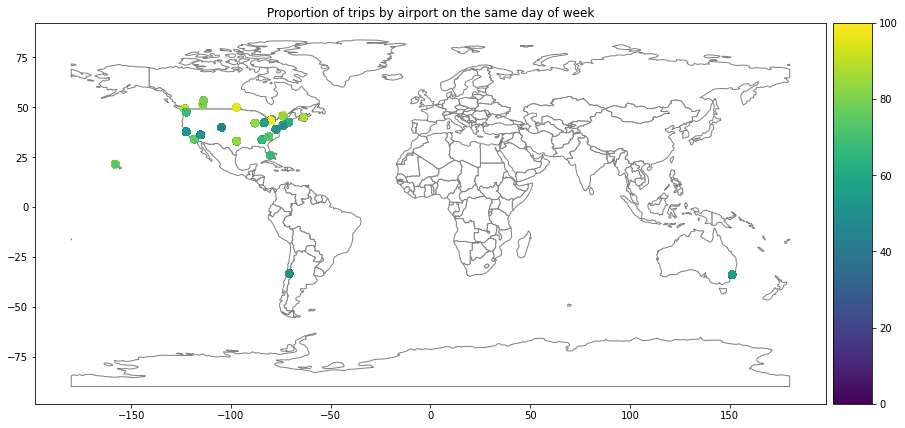

In [ ]:
# Map or the world
world_map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

fig, ax = plt.subplots(1, 1, figsize = (15, 12))

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size = '5%', pad = 0.1)

world_map.plot(ax = ax, color = 'white', edgecolor = 'gray')
g = gdf.plot(column = 'PercentOfBaseline', ax = ax, markersize = 50,
            legend = True, cax = cax)
g.set_title("Proportion of trips by airport on the same day of week")

plt.show()


Text(0.5, 1.0, 'Airport Records')

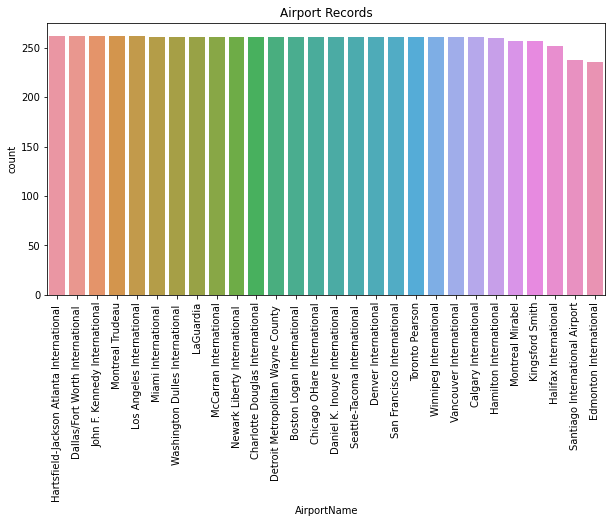

In [ ]:
plt.figure(figsize = (10,5))

g = sns.countplot(data = df_airport, x = "AirportName",
                 order = df_airport['AirportName'].value_counts().index)

g.set_xticklabels(g.get_xticklabels(), rotation = 90)

g.set_title("Airport Records")

Text(0.5, 1.0, 'Weekly Records')

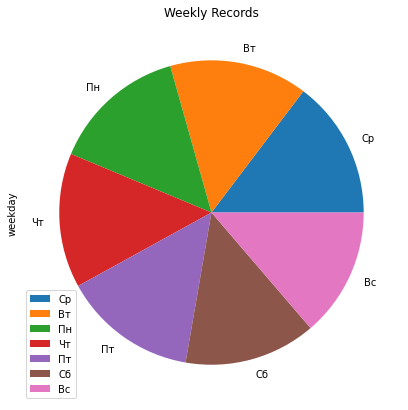

In [ ]:
df_week = pd.DataFrame(df_airport['weekday'].value_counts())

g = df_week.plot.pie(y = 'weekday', figsize = (7,7))

g.set_title("Weekly Records")

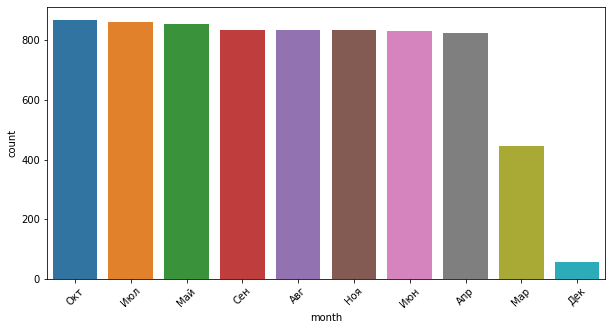

In [ ]:
plt.figure(figsize = (10,5))
g=sns.countplot(data=df_airport,x='month',
                order=df_airport['month'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation = 45)
g.set_title("Airport Records")
g

# Lets calculate the average of traffic by airport

In [ ]:
df_airport_all_mean = df_airport.groupby(['AirportName']).mean()

df_airport_all_mean = df_airport_all_mean.reset_index()
df_airport_all_mean.head(5)

,AirportName,Version,PercentOfBaseline,long,lat
0,Boston Logan International,1.0,64.704981,-71.010291,42.363633
1,Calgary International,1.0,89.513410,-114.013123,51.118475
2,Charlotte Douglas International,1.0,75.375479,-80.947811,35.213689
3,Chicago OHare International,1.0,73.084291,-87.910595,41.980460
4,Dallas/Fort Worth International,1.0,75.293893,-97.039498,32.894059


In [ ]:
import plotly.express as px
fig = px.scatter_mapbox(df_airport_all_mean,
                       lat = 'lat',
                       lon = 'long',
                       hover_name = 'AirportName',
                       hover_data = ['PercentOfBaseline'],
                       color = 'PercentOfBaseline',
                       zoom = 1,
                       height = 600,
                       size = 'PercentOfBaseline',
                       size_max = 30,
                       opacity = 0.5,
                       width = 1300)

fig.update_layout(mapbox_style = 'carto-positron')
fig.update_layout(margin = {'r': 0, 't': 0, 'l': 0, 'b': 0})
fig.show()

# Exporting data for Power BI Analyzis

In [ ]:
data_airport_clean=df_airport[['Date','AirportName','PercentOfBaseline','City','State','Country','weekday','month','long','lat']]

# Export the data
data_export=pd.merge(data_airport_clean,df_airport_all_mean[['PercentOfBaseline','AirportName']],how="left",left_on='AirportName',right_on='AirportName')

data_export=data_export.rename(columns={"PercentOfBaseline_x":"PercentOfBaseline", 
                                        "PercentOfBaseline_y":"AvgPercentOfBaseline"})
data_export
data_export.to_csv('airport_traffic.csv', encoding='utf-8-sig')
files.download("airport_traffic.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Can we forecast the demand by airport in the future

In [ ]:
df_airport['AirportName'].unique()

array(['Kingsford Smith', 'Santiago International Airport',
       'Calgary International', 'Edmonton International',
       'Vancouver International', 'Winnipeg International',
       'Halifax International', 'Toronto Pearson',
       'Hamilton International', 'Montreal Mirabel', 'Montreal Trudeau',
       'Los Angeles International', 'San Francisco International',
       'Denver International', 'Miami International ',
       'Hartsfield-Jackson Atlanta International ',
       'Daniel K. Inouye International ', 'Chicago OHare International',
       'Boston Logan International ',
       'Detroit Metropolitan Wayne County ',
       'Charlotte Douglas International', 'Newark Liberty International ',
       'McCarran International', 'LaGuardia',
       'John F. Kennedy International',
       'Dallas/Fort Worth International ',
       'Washington Dulles International ',
       'Seattle-Tacoma International '], dtype=object)

In [ ]:
airport = 'San Francisco International'

data_airport=df_airport[df_airport['AirportName']==airport]
data_airport.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography,weekday,month,long,lat,geometry
3068,Daily,2020-04-20,1.0,San Francisco International,46,POINT(-122.38393507603 37.6211875471696),South San Francisco,California,US-CA,United States of America (the),"POLYGON((-122.387909889221 37.6395702779519, -...",Пн,Апр,-122.383935,37.621188,POINT (-122.38394 37.62119)
3069,Daily,2020-04-23,1.0,San Francisco International,39,POINT(-122.38393507603 37.6211875471696),South San Francisco,California,US-CA,United States of America (the),"POLYGON((-122.387909889221 37.6395702779519, -...",Чт,Апр,-122.383935,37.621188,POINT (-122.38394 37.62119)
3070,Daily,2020-06-20,1.0,San Francisco International,36,POINT(-122.38393507603 37.6211875471696),South San Francisco,California,US-CA,United States of America (the),"POLYGON((-122.387909889221 37.6395702779519, -...",Сб,Июн,-122.383935,37.621188,POINT (-122.38394 37.62119)
3071,Daily,2020-06-27,1.0,San Francisco International,46,POINT(-122.38393507603 37.6211875471696),South San Francisco,California,US-CA,United States of America (the),"POLYGON((-122.387909889221 37.6395702779519, -...",Сб,Июн,-122.383935,37.621188,POINT (-122.38394 37.62119)
3072,Daily,2020-07-05,1.0,San Francisco International,29,POINT(-122.38393507603 37.6211875471696),South San Francisco,California,US-CA,United States of America (the),"POLYGON((-122.387909889221 37.6395702779519, -...",Вс,Июл,-122.383935,37.621188,POINT (-122.38394 37.62119)


In [ ]:
data_airport=data_airport.sort_values(by="Date")
data_airport.set_index('Date',inplace=True)
data_airport = data_airport[['PercentOfBaseline']]
data_airport.head(5)

,PercentOfBaseline
Date,
2020-03-16,81
2020-03-17,89
2020-03-18,70
2020-03-19,59
2020-03-20,58


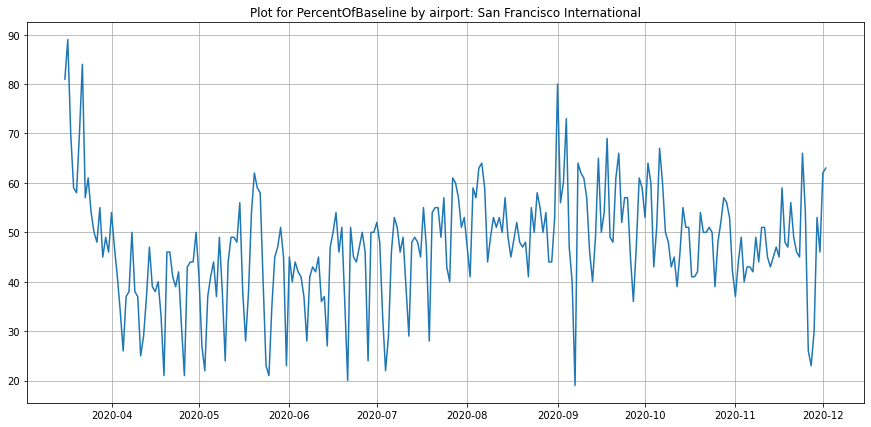

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(data_airport['PercentOfBaseline'])
plt.title("Plot for PercentOfBaseline by airport: "+airport)
plt.grid()
plt.show();

# ARIMA MODEL SIMULATION

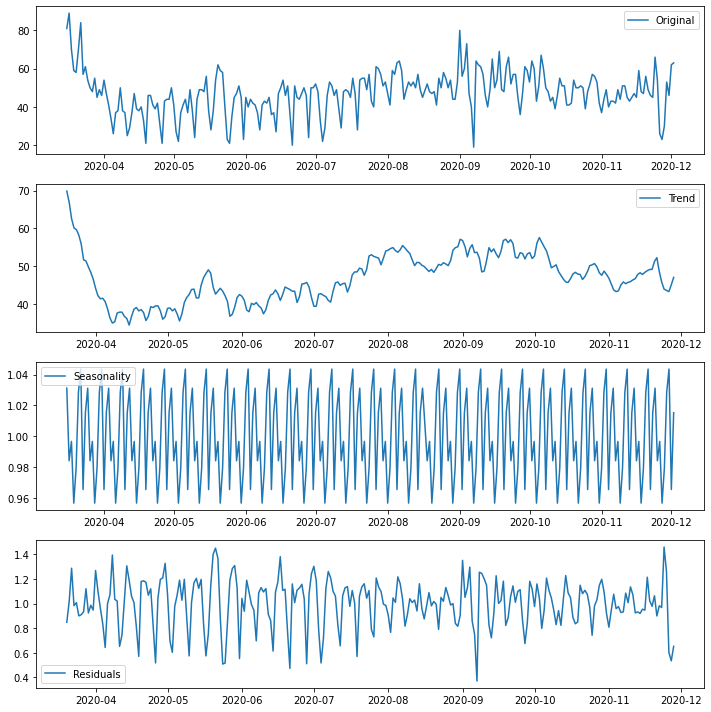

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(x=data_airport['PercentOfBaseline'].dropna(),model='multiplicative',period=9)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(data_airport['PercentOfBaseline'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout();

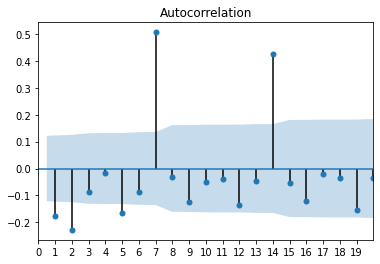

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

data_airport['diff'] = data_airport['PercentOfBaseline'] - data_airport['PercentOfBaseline'].shift(1)
plot_acf(data_airport['diff'].dropna(),zero=False)
plt.xlim(0,20)
plt.xticks(np.arange(0,20,1))
plt.show(); #q=1 or q=0

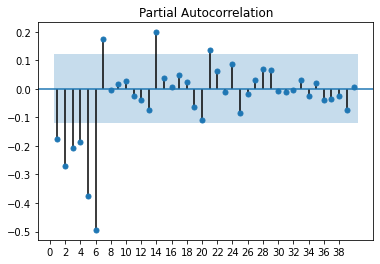

In [ ]:
plot_pacf(data_airport['diff'].dropna(),zero=False,lags=40,method='ols',alpha=0.05)
plt.xticks(np.arange(0,40,2))
plt.show(); # p=3,5

In [ ]:
# Creating the model
df = pd.DataFrame(data_airport['diff'])
df.dropna(inplace=True)
# Looking to fit ARMA model
from statsmodels.tsa.arima_model import ARMA
# Create Training and Test
train = df.iloc[:212]
test = df.iloc[212:]
# Build Model
model = ARMA(train, order=(6,0))  
fitted = model.fit()  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(len(test.index), alpha=0.05);  # 95% conf

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                              ARMA Model Results                              
Dep. Variable:                   diff   No. Observations:                  212
Model:                     ARMA(6, 0)   Log Likelihood                -741.939
Method:                       css-mle   S.D. of innovations              7.954
Date:                Wed, 07 Sep 2022   AIC                           1499.879
Time:                        20:09:49   BIC                           1526.731
Sample:                             0   HQIC                          1510.732
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1280      0.123     -1.043      0.297      -0.369       0.113
ar.L1.diff    -0.6012      0.059    -10.133      0.000      -0.717      -0.485
ar.L2.diff    -0.6416      0.060    -10.707      0.0

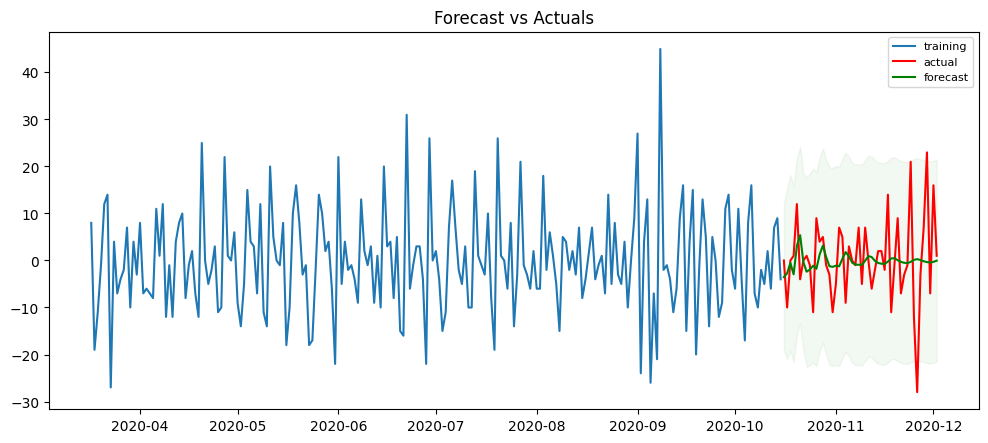

In [ ]:
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual',color='r')
plt.plot(fc_series, label='forecast',color='g')
plt.fill_between(lower_series.index, lower_series, upper_series,color='g', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='best', fontsize=8)
plt.show()

In [ ]:
fc_series

Date
2020-10-16   -3.532675
2020-10-17   -2.723150
2020-10-18   -0.521396
2020-10-19   -2.946232
2020-10-20    3.104204
2020-10-21    5.389438
2020-10-22   -0.348397
2020-10-23   -2.390196
2020-10-24   -1.930439
2020-10-25   -1.103860
2020-10-26   -1.776728
2020-10-27    1.259462
2020-10-28    3.164376
2020-10-29    0.751488
2020-10-30   -1.207456
2020-10-31   -1.361834
2020-11-01   -1.097086
2020-11-02   -1.244627
2020-11-03    0.368596
2020-11-04    1.783281
2020-11-05    0.900813
2020-11-06   -0.455449
2020-11-07   -0.887792
2020-11-08   -0.908350
2020-11-09   -0.938798
2020-11-10   -0.053731
2020-11-11    0.936240
2020-11-12    0.733203
2020-11-13   -0.074438
2020-11-14   -0.531778
2020-11-15   -0.686578
2020-11-16   -0.723270
2020-11-17   -0.237448
2020-11-18    0.428477
2020-11-19    0.499020
2020-11-20    0.073558
2020-11-21   -0.296461
2020-11-22   -0.491276
2020-11-23   -0.555673
2020-11-24   -0.298881
2020-11-25    0.134102
2020-11-26    0.289616
2020-11-27    0.098029
2020-1

In [ ]:
len(test.index)

48